In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
#import data file from local path
US_China_path = 'https://raw.githubusercontent.com/NianAnny/MATH310Lab/main/Lab2/US-China.csv'
maunalLoa_path = 'https://raw.githubusercontent.com/NianAnny/MATH310Lab/main/Lab2/maunaLoa.csv'

US_China = pd.read_csv(US_China_path)
maunalLoa = pd.read_csv(maunalLoa_path)

print(US_China.columns.tolist())
print(maunalLoa.columns.tolist())

['Year', 'Years after 1980', 'United States (CO2 mmt)', 'China (CO2 mmt)', 'U.S. Pop ', 'China Population', 'US per capita emission (metirc ton per person)', 'China per capita emission (metirc ton per person)']
['data']


<H1>Q1: China and the U.S.</h1>

<h2>a.</h2>

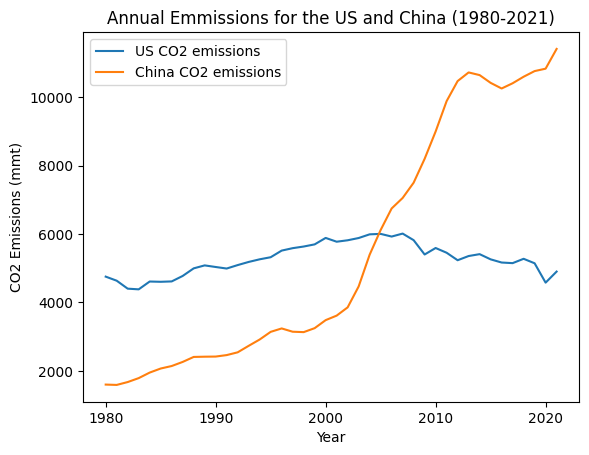

In [65]:
x = US_China['Years after 1980'].values
x_year = US_China['Year'].values
US_CO2 = US_China['United States (CO2 mmt)'].values
China_CO2 = US_China['China (CO2 mmt)'].values


plt.plot(x_year, US_CO2, label='US CO2 emissions')
plt.plot(x_year, China_CO2, label='China CO2 emissions')
plt.xlabel("Year")
plt.ylabel("CO2 Emissions (mmt)")
plt.title("Annual Emmissions for the US and China (1980-2021)")
plt.legend()
plt.show()

<h2>b.</h2>

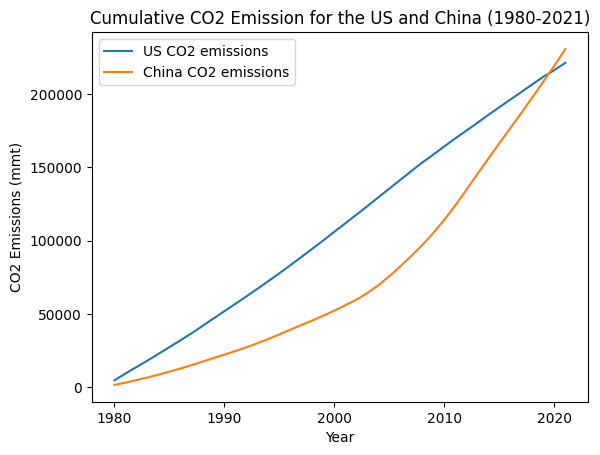

In [66]:
US_cumulative = np.cumsum(US_CO2)
China_cumulative = np.cumsum(China_CO2)

plt.plot(x_year, US_cumulative, label='US CO2 emissions')
plt.plot(x_year, China_cumulative, label='China CO2 emissions')
plt.xlabel("Year")
plt.ylabel("CO2 Emissions (mmt)")
plt.title("Cumulative CO2 Emission for the US and China (1980-2021)")
plt.legend()
plt.show()

<h1>Q2: CO2 Levels Over Time</h1>

<h2>a.</h2>

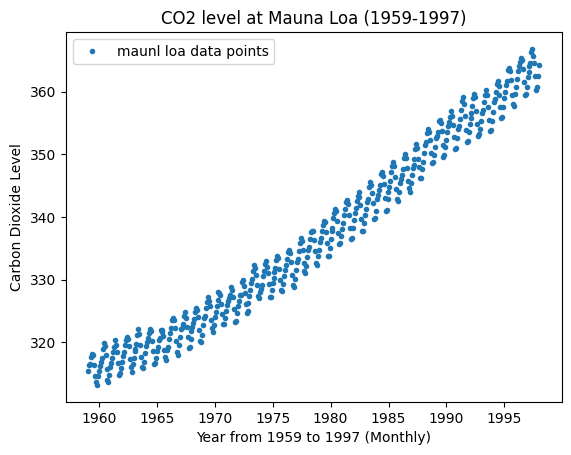

In [63]:
# From Jan. 1959 to Dec. 1997, which has 39 years (39*12 = 468 months)
maunalLoa_data = maunalLoa['data'].values
dates = pd.date_range(start ='1959-01', end='1998-01', freq = 'ME') # from 1959-1-31 to 1997-12-31
maunalLoa['date'] = dates
date = dates

plt.plot(date, maunalLoa_data, ".", label="maunl loa data points")
plt.xlabel("Year from 1959 to 1997 (Monthly)")
plt.ylabel('Carbon Dioxide Level')
plt.title("CO2 level at Mauna Loa (1959-1997)")
plt.legend()
plt.show()

<h2>b.</h2>

The given data points seems forming a overall linear trend but have increasing oscillations yearly, so I assume $ax+b$ as the part to capture the overall linear form and $csin(dx)$ to capture the sub annual changes, which gives a form of $f(x) = ax + b + csin(dx)$ and $a, b, c, d$ are constant. In this case, first guess a = 0.1, b = 315, c = 3, d = $\frac{\pi}{6}$

The model line seems fit the curve well, capturing the overall trend of real data points, 
but the total squared residuals between the real points and predicted points is 2928.098507888809


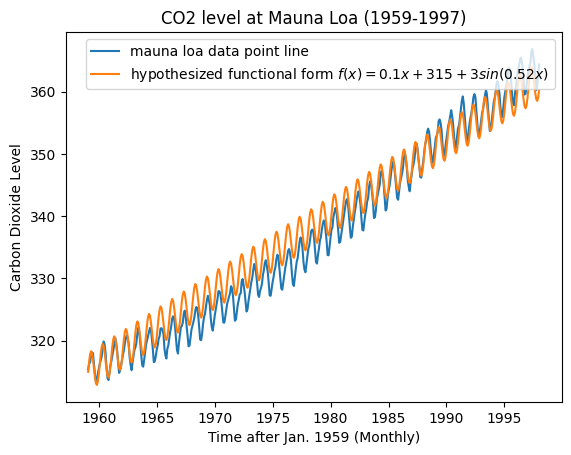

In [76]:
a = 0.1
b = 315
c = 3
d = np.pi/6
f_guess = lambda x: a*x + b + c*np.sin(d*x)

# predict CO2 level values with the given linear function 
n = maunalLoa_data.size
x_month = np.arange(0, n, 1)
guess_data = []
for i in range(n):
    guess = f_guess(i)
    guess_data.append(guess)
    
# squared errors
sqr_residuals = (np.abs(maunalLoa_data - guess_data))**2
total_sqr_error = np.sum(sqr_residuals)
print(f"The model line seems fit the curve well, capturing the overall trend of real data points, \nbut the total squared residuals between the real points and predicted points is {total_sqr_error}")

plt.plot(dates, maunalLoa_data, label="mauna loa data point line")
plt.plot(dates, f_guess(x_month), label=f"hypothesized functional form $f(x) = {a}x+{b}+{c}sin({d:.02f}x)$")
plt.xlabel("Time after Jan. 1959 (Monthly)")
plt.ylabel('Carbon Dioxide Level')
plt.title("CO2 level at Mauna Loa (1959-1997)")
plt.legend()
plt.show()

<h2>c.</h2>

The best fitted linear function:
 f(x) = 0.10923385330730946 x + 311.54666371465004 + 2.7885518530318625sin(0.5231952381818348x)

The best fitted curve has an error of 1374.034911209067 compared to the real points.
The fitted model appears to closely capture the actual data, both overall trends and sub annual oscillations, with a decreased error compared to the previous guess.
This indicates that the model is reasonably effective in capturing the observed dynamics of CO2 levels over the given time.


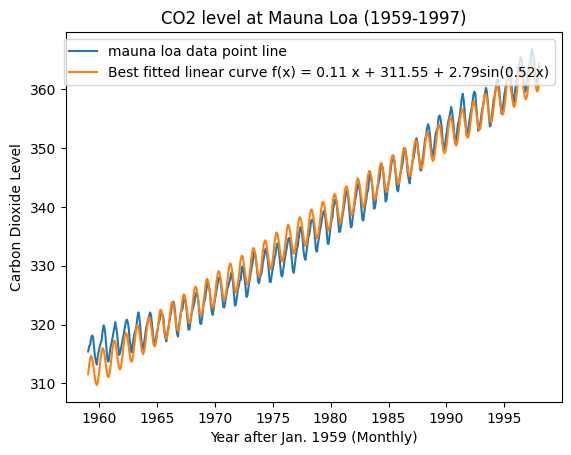

In [75]:
from scipy.optimize import minimize

y_real = maunalLoa_data
x_data = x_month

# apply the least square approximation
def Least_square(params):
    para = params
    y_approx = para[0]*x_data + para[1] + para[2]*np.sin(para[3]*x_data)
    residuals = np.abs(y_real - y_approx)
    return np.sum(residuals**2)

initial = np.array([a, b, c, d])
approx_para = minimize(Least_square, initial)
Best_fit_para = approx_para.x

m = Best_fit_para[0]
n = Best_fit_para[1]
p = Best_fit_para[2]
q = Best_fit_para[3]


print(f"The best fitted linear function:\n f(x) = {m} x + {n} + {p}sin({q}x)")
new_total_error = Least_square(Best_fit_para)
print(f"\nThe best fitted curve has an error of {new_total_error} compared to the real points.")
print("The fitted model appears to closely capture the actual data, both overall trends and sub annual oscillations, with a decreased error compared to the previous guess.")
print("This indicates that the model is reasonably effective in capturing the observed dynamics of CO2 levels over the given time.")

f_new= lambda x: m*x + n + p*np.sin(q*x)

plt.plot(date, maunalLoa_data, label="mauna loa data point line")
plt.plot(date, f_new(x_month), label=f"Best fitted linear curve f(x) = {m:.02f} x + {n:.02f} + {p:.02f}sin({q:.02f}x)")
plt.xlabel("Year after Jan. 1959 (Monthly)")
plt.ylabel('Carbon Dioxide Level')
plt.title("CO2 level at Mauna Loa (1959-1997)")
plt.legend()
plt.show()

<h2>d.</h2>

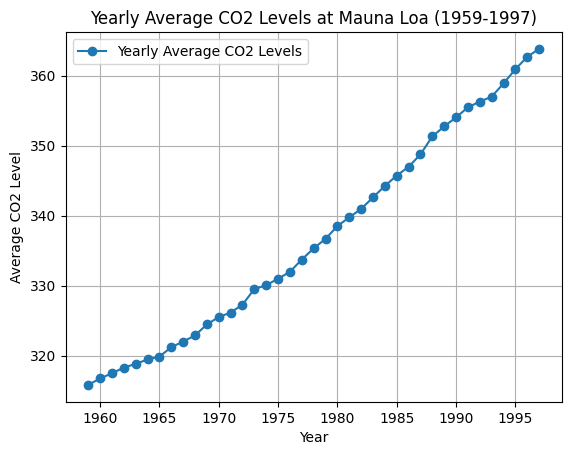

In [90]:
y_real = maunalLoa_data
x_data = x_month
year = x_data/12 + 1959

# Converting months to years for averaging
years = np.floor(year).astype(int)  # Year for each data point, each year have 12 points

# Calculating the average CO2 level for each year
year_avg_co2 = pd.DataFrame({'Year': years, 'CO2': y_real}).groupby('Year')['CO2'].mean()

# Plotting the yearly average CO2 levels
plt.plot(year_avg_co2.index, year_avg_co2.values, label='Yearly Average CO2 Levels', marker='o', linestyle='-')
plt.title('Yearly Average CO2 Levels at Mauna Loa (1959-1997)')
plt.xlabel('Year')
plt.ylabel('Average CO2 Level')
plt.legend()
plt.grid(True)
plt.show()

<h2>e.</h2>

THe rate of yearly changes express a variability in how Mauna Loa CO2 levels increased. Some years has a sharper increase than others like 1973 and 1988, which could be influenced by a variety of factors including economic, political, and environmental impacts. Overall, the trend indicates an accelerating increase in CO2 levels since positive rate values.

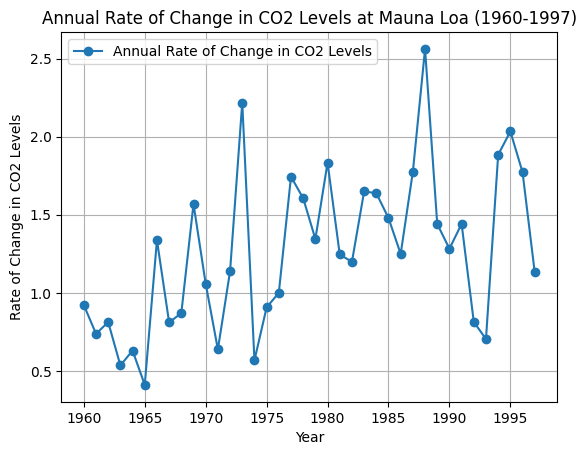

In [91]:
x_data = x_month

# Computing and plotting the annual rate of change in CO2 levels
rate = np.diff(year_avg_co2)

plt.plot(year_avg_co2.index[1:], rate, label='Annual Rate of Change in CO2 Levels', marker='o', linestyle='-')
plt.title('Annual Rate of Change in CO2 Levels at Mauna Loa (1960-1997)') # no more data before 1959
plt.xlabel('Year')
plt.ylabel('Rate of Change in CO2 Levels')
plt.legend()
plt.grid(True)
plt.show()